<a href="https://colab.research.google.com/github/icardemil64/IA-Control-2/blob/main/Control_2_Iv%C3%A1n_Cardemil_Categorical_Crossentropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importar librerías

In [83]:
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
print("Tensorflow: " + tf.__version__)

Tensorflow: 2.5.0


#Importar datos

In [3]:
from keras.datasets import reuters

In [4]:
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [169]:
topicos = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
 'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
 'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
 'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
 'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']

##Comprobando tamaño del dataset

In [7]:
print("Datos de entrenamiento ", train_data.shape)
print("Datos de prueba ", test_data.shape)

Datos de entrenamiento  (8982,)
Datos de prueba  (2246,)


##Buscar las noticias de Chile

In [45]:
word_index = reuters.get_word_index()

In [86]:
chile_key = word_index.get('chile')
chile_key

4455

###Noticias de Chile en entramiento

In [89]:
noticias_chile_train = []
for i in range(8982):
  if chile_key in train_data[i]:
    noticias_chile_train.append(i)

In [90]:
noticias_chile_train

[1153, 2715, 3926, 4279, 4491, 4724, 4755, 5766, 5827, 7057, 7791, 8885]

###Noticias de Chile en prueba

In [93]:
noticias_chile_test = []
for i in range(2246):
  if chile_key in test_data[i]:
    noticias_chile_test.append(i)

In [94]:
noticias_chile_test

[1068, 1272, 1805]

###Verificación de noticias

In [51]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [ ]:
reverse_word_index

In [158]:
def decodificar_comentario(data):
  decode_review = ' '.join(
      [reverse_word_index.get(i - 3,'?') for i in data]
  )
  return decode_review

In [159]:
decodificar_comentario(train_data[1153])

"? u s mine production of silver rose to 2 295 230 troy ounces in december from 2 181 082 in november the interior department's bureau of mines said u s imports of silver in december were 8 458 000 ounces vs 19 950 000 in november and 8 840 000 in december 1985 silver exports totaled 1 549 000 ounces in december vs 2 346 000 in november and 1 504 000 ounces in december 1985 silver mining production in the 12 month period jan dec 1986 totaled 31 720 769 ounces vs 39 357 197 ounces produced over the same period in 1985 imports of silver in jan dec 1986 totaled 144 890 000 ounces vs 152 601 000 ounces in jan dec 1985 while silver exports stood at 25 114 000 ounces and 24 756 000 ounces over the respective periods the bureau said reuter 3"

In [160]:
train_labels[1153]

42

#Preprocesamiento de datos

##Vectorización de comentarios

In [72]:
def vectorize(seq, dim = 10000):
  results = np.zeros((len(seq), dim))
  for i, seq in enumerate(seq):
    results[i,seq] = 1
  return results

In [74]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)

##One hot encoding de los labels

In [85]:
from tensorflow.keras.utils import to_categorical

In [154]:
y_train = to_categorical(train_labels,num_classes=46)
y_test = to_categorical(test_labels,num_classes=46)

In [155]:
y_train[1068]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

##Separa datos

In [102]:
x_val = x_train[:1000]
x_trn = x_train[1000:]
y_val = y_train[:1000]
y_trn = y_train[1000:]

#Crear modelo

In [112]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Red con 3 capas de 128 neuronas cada una y una última capa de salida con 46 neuronas para clasificar en los tópicos, utilizando la función de activación softmax.

In [106]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(10000,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(46,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [107]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               1280128   
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 46)                5934      
Total params: 1,319,086
Trainable params: 1,319,086
Non-trainable params: 0
_________________________________________________________________


##Ejecutar el modelo

In [108]:
history = model.fit(x_trn,y_trn,epochs=10,batch_size=500,validation_data=(x_val,y_val))

Epoch 1/10
16/16 [==============================] - 15s 104ms/step - loss: 3.3579 - accuracy: 0.4086 - val_loss: 1.8605 - val_accuracy: 0.5420
Epoch 2/10
16/16 [==============================] - 1s 70ms/step - loss: 1.6769 - accuracy: 0.6153 - val_loss: 1.3566 - val_accuracy: 0.6930
Epoch 3/10
16/16 [==============================] - 1s 70ms/step - loss: 1.1569 - accuracy: 0.7323 - val_loss: 1.1218 - val_accuracy: 0.7450
Epoch 4/10
16/16 [==============================] - 1s 72ms/step - loss: 0.8280 - accuracy: 0.8108 - val_loss: 1.0252 - val_accuracy: 0.7840
Epoch 5/10
16/16 [==============================] - 1s 71ms/step - loss: 0.5824 - accuracy: 0.8701 - val_loss: 0.9531 - val_accuracy: 0.8150
Epoch 6/10
16/16 [==============================] - 1s 70ms/step - loss: 0.3722 - accuracy: 0.9200 - val_loss: 0.9462 - val_accuracy: 0.8170
Epoch 7/10
16/16 [==============================] - 1s 70ms/step - loss: 0.2495 - accuracy: 0.9470 - val_loss: 0.9660 - val_accuracy: 0.8140
Epoch 8/10


In [109]:
result = model.evaluate(x_test,y_test)

71/71 [==============================] - 1s 4ms/step - loss: 1.1568 - accuracy: 0.7881


##Verificar overfitting

In [110]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

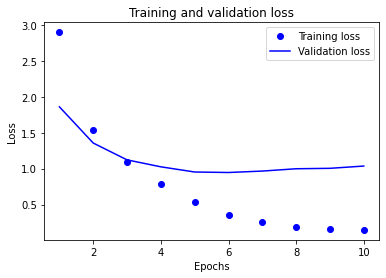

In [147]:
import matplotlib.pyplot as plt

plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

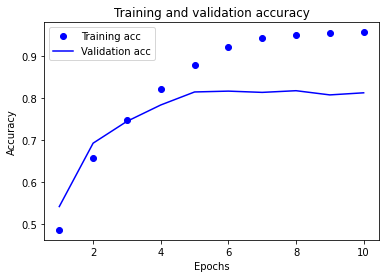

In [148]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, (len(history_dict['accuracy']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##Corregir overfitting

Para mejor el desempeño del modelo se realizarán dos acciones:

*   Utilizar la técnia del early stopping colocando el foco en los valores de precisión.



In [120]:
from tensorflow.keras.callbacks import EarlyStopping 

In [138]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience= 2, verbose= 1)

In [139]:
model_fix = Sequential()
model_fix.add(Dense(128, activation='relu', input_shape=(10000,)))
model_fix.add(Dense(128, activation='relu'))
model_fix.add(Dense(128, activation='relu'))
model_fix.add(Dense(46,activation='softmax'))
model_fix.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [140]:
model_fix.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 128)               1280128   
_________________________________________________________________
dense_37 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_38 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_39 (Dense)             (None, 46)                5934      
Total params: 1,319,086
Trainable params: 1,319,086
Non-trainable params: 0
_________________________________________________________________


##Ejecutar el modelo corregido

In [141]:
history_fix = model_fix.fit(x_trn,y_trn,epochs=10,batch_size=500,validation_data=(x_val,y_val),callbacks=[es])

Epoch 1/10
16/16 [==============================] - 2s 90ms/step - loss: 3.4015 - accuracy: 0.3975 - val_loss: 1.9145 - val_accuracy: 0.5440
Epoch 2/10
16/16 [==============================] - 1s 69ms/step - loss: 1.6970 - accuracy: 0.6216 - val_loss: 1.3983 - val_accuracy: 0.6910
Epoch 3/10
16/16 [==============================] - 1s 69ms/step - loss: 1.1843 - accuracy: 0.7419 - val_loss: 1.1665 - val_accuracy: 0.7400
Epoch 4/10
16/16 [==============================] - 1s 70ms/step - loss: 0.8471 - accuracy: 0.8117 - val_loss: 1.0402 - val_accuracy: 0.7790
Epoch 5/10
16/16 [==============================] - 1s 69ms/step - loss: 0.5654 - accuracy: 0.8705 - val_loss: 0.9874 - val_accuracy: 0.8010
Epoch 6/10
16/16 [==============================] - 1s 70ms/step - loss: 0.3788 - accuracy: 0.9180 - val_loss: 0.9851 - val_accuracy: 0.8070
Epoch 7/10
16/16 [==============================] - 1s 69ms/step - loss: 0.2462 - accuracy: 0.9453 - val_loss: 0.9995 - val_accuracy: 0.8190
Epoch 8/10
16

In [143]:
result = model_fix.evaluate(x_test,y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.1127 - accuracy: 0.7885


In [150]:
history_fix_dict = history_fix.history
history_fix_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

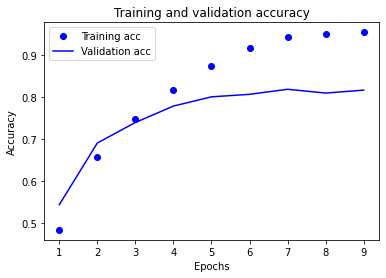

In [151]:
plt.clf()
acc_values = history_fix_dict['accuracy']
val_acc_values = history_fix_dict['val_accuracy']
epochs = range(1, (len(history_fix_dict['accuracy']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [153]:
model_fix.save('icardemil_categorical_crossentropy.h5')

#Realizando predicciones

In [156]:
predictions = model_fix(x_test)

##Obtener nombre topico

In [170]:
def decodificar_topico(i):
  return topicos[i]

##Primeras 10 noticias

In [171]:
for i in range(10):
  print("Clase predicha: ", decodificar_topico(np.argmax(predictions[i])))
  print("Clase real: ", decodificar_topico(test_labels[i]))
  print("Comentario: ")
  print(decodificar_comentario(test_data[i]))
  print()

Clase predicha:  earn
Clase real:  earn
Comentario: 
? the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to ? growth and expansion plans for ? inc and ? inc over the next two years a and p said the acquisition of ? in august 1986 and ? in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt ? ? of west germany reuter 3

Clase predicha:  sugar
Clase real:  sugar
Comentario: 
? philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration ? chairm

##Noticias de Chile

In [172]:
for idx in noticias_chile_test:
  print("Clase predicha: ", decodificar_topico(np.argmax(predictions[i])))
  print("Clase real: ", decodificar_topico(test_labels[i]))
  print("Comentario: ")
  print(decodificar_comentario(test_data[i]))
  print()

Clase predicha:  earn
Clase real:  earn
Comentario: 
? bankers trust new york corp said it has placed its approximately 540 mln dlrs of medium and long term loans to brazil on non accrual status and that first quarter net income will be reduced by about seven mln dlrs as a result brazil suspended interest payments on its 68 billion dlrs of medium and long term debt on february 22 u s banking regulations do not require banks to stop accruing interest on loans until payments are 90 days overdue but bankers trust said it acted now because of the high potential of a continued suspension that would result in reaching the 90 day limit in the second quarter of 1987 assuming no cash payments at current interest rates are received for the rest of 1987 bankers trust estimated that full year net income would be reduced by about 30 mln dlrs bankers trust said it assumes that debt negotiations between brazil and its commercial bank lenders will lead to the resumption of interest payments the negoti

##Cálculo del error

In [168]:
suma = 0
for i in range(len(predictions)):
  suma += abs(np.argmax(predictions[i]) - test_labels[i])
error = suma/len(predictions)
print("El promedio del error entre lo predicho y lo real es:", error)

El promedio del error entre lo predicho y lo real es: 2.1656277827248442
